C:\Users\HP\AppData\Local\Temp\ipykernel_2152\2734049962.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)


Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

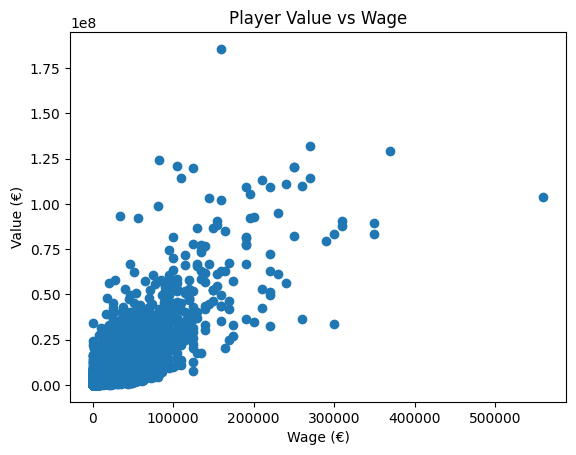

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Years_at_Club
372,241671,D. Livaković,Dominik Livaković,https://cdn.sofifa.com/players/241/671/21_60.png,http://sofifa.com/player/241671/dominik-livako...,Croatia,25,80,85,Dinamo Zagreb,...,Medium,1 ★,80,78,74,82,55,79,83,9.035616
697,244467,O. Kolář,Ondřej Kolář,https://cdn.sofifa.com/players/244/467/21_60.png,http://sofifa.com/player/244467/ondrej-kolar/2...,Czech Republic,25,78,83,SK Slavia Praha,...,Medium,1 ★,75,73,81,80,58,79,50,6.638356
863,194209,Y. El Arabi,Youssef El Arabi,https://cdn.sofifa.com/players/194/209/21_60.png,http://sofifa.com/player/194209/youssef-el-ara...,Morocco,33,78,78,Olympiacos CFP,...,Medium,2 ★,71,81,67,78,37,70,8,5.186301
1195,216350,A. Ademi,Arijan Ademi,https://cdn.sofifa.com/players/216/350/21_60.png,http://sofifa.com/player/216350/arijan-ademi/2...,North Macedonia,29,76,76,Dinamo Zagreb,...,High,1 ★,63,64,65,68,74,82,8,14.205479
1354,244380,V. Mykolenko,Vitaliy Mykolenko,https://cdn.sofifa.com/players/244/380/21_60.png,http://sofifa.com/player/244380/vitaliy-mykole...,Ukraine,21,76,84,Dynamo Kyiv,...,Medium,1 ★,78,44,62,57,73,63,199,7.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,256970,A. Karabec,Adam Karabec,https://cdn.sofifa.com/players/256/970/21_60.png,http://sofifa.com/player/256970/adam-karabec/2...,Czech Republic,16,67,83,Sparta Praha,...,Medium,1 ★,72,60,65,71,35,54,173,4.364384
8283,250839,J. Pretell,Jesús Pretell,https://cdn.sofifa.com/players/250/839/21_60.png,http://sofifa.com/player/250839/jesus-pretell/...,Peru,21,67,82,Melgar FBC,...,Medium,1 ★,69,50,65,63,63,65,32,5.695890
8423,254206,A. Alvarado,Alexander Alvarado,https://cdn.sofifa.com/players/254/206/21_60.png,http://sofifa.com/player/254206/alexander-alva...,Ecuador,21,67,75,SD Aucas,...,Low,1 ★,75,58,61,68,35,68,5,6.619178
9013,252027,A. Vranckx,Aster Vranckx,https://cdn.sofifa.com/players/252/027/21_60.png,http://sofifa.com/player/252027/aster-vranckx/...,Belgium,17,66,86,KV Mechelen,...,High,1 ★,71,56,64,68,57,72,826,5.200000


In [8]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Load the dataset with low_memory=False to handle mixed types
df = pd.read_csv('fifa21.csv', low_memory=False)

# Convert Height to numerical forms
def convert_height(height):
    if pd.isnull(height) or not isinstance(height, str):
        return None
    try:
        feet, inches = height.split("'")
        return int(feet) * 12 + int(inches)
    except ValueError:
        return None

df['Height'] = df['Height'].apply(convert_height)

# Clean Weight column
def clean_weight(weight):
    if pd.isnull(weight):
        return None
    weight = str(weight).replace('lbs', '').replace('kg', '').replace(',', '')  # Remove non-numeric characters
    try:
        return float(weight)
    except ValueError:
        return None

df['Weight'] = df['Weight'].apply(clean_weight)

# Remove newline characters from all string columns
df = df.applymap(lambda x: x.replace('\n', '') if isinstance(x, str) else x)

# Convert 'Joined' to datetime and calculate years at the club
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')
df['Years_at_Club'] = (datetime.now() - df['Joined']).dt.days / 365
players_more_than_10_years = df[df['Years_at_Club'] > 10]


# Convert 'Value', 'Wage', and 'Release Clause' to numeric values
def convert_value(value):
    if pd.isnull(value):
        return None
    value = value.replace('€', '').replace('K', 'e3').replace('M', 'e6').replace('B', 'e9')
    return float(eval(value))

df['Value'] = df['Value'].apply(convert_value)
df['Wage'] = df['Wage'].apply(convert_value)
df['Release Clause'] = df['Release Clause'].apply(convert_value)

# Check columns with stars
print(df.columns)  # Check available columns

# Process columns with stars if they exist
columns_with_stars = ['Skill Moves', 'Weak Foot']
for col in columns_with_stars:
    if col in df.columns:
        df[col] = df[col].str.replace('★', '').astype(float)
    else:
        print(f"Column '{col}' is not present in the dataset.")

# Plot scatter plot between Wage and Value
plt.scatter(df['Wage'], df['Value'])
plt.xlabel('Wage (€)')
plt.ylabel('Value (€)')
plt.title('Player Value vs Wage')
plt.show()

# Identify underpaid high-value players
high_value_threshold = df['Value'].quantile(0.75)
low_wage_threshold = df['Wage'].quantile(0.25)
underpaid_high_value_players = df[(df['Value'] > high_value_threshold) & (df['Wage'] < low_wage_threshold)]
underpaid_high_value_players